https://nbviewer.jupyter.org/format/slides/github/quantopian/pyfolio/blob/master/pyfolio/examples/pyfolio_talk_slides.ipynb

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from QUANTAXIS import QA_fetch_stock_day_adv
from QUANTAXIS import QA_fetch_index_day_adv
import ploter
import talib
import numpy as np
import quantaxis_ext
import settings
import units
import header
import calculator as calc
import matplotlib.pyplot as plt
import jupyter_helper

import pyfolio as pf

#设定绘图的默认大小
import matplotlib
matplotlib.rcParams["figure.figsize"]=[16,5]

#加载 seaborn，并且设置默认使用 seaborn
import seaborn as sns
sns.set()

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['Noto Sans CJK SC','SimHei']
matplotlib.rcParams['axes.unicode_minus']=False #用来正常显示负号

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
START_VALS = 1000000 # 初始投资总额
START = '2018-01-01' # 初始投资日期
END = '2018-12-31' # 结束投资日期
# 投资组合：贵州茅台、中国平安、招商银行、格力电器
SYMBOLS = ['600519','601318','600036','000651'] 
# 比率分配
ALLOCS = [0.4,0.4,0.1,0.1]

ZS_CODE=jupyter_helper.get_zs_code()

In [3]:
daily_adv=quantaxis_ext.fetch_index_stock_daily_adv(SYMBOLS, ZS_CODE, START, END)
daily_rets=daily_adv.pct_change()[1:]

## 指数日回报率

In [4]:
zs_rets=daily_rets[['zs_'+ZS_CODE]]
zs_rets.head()

,zs_399300
date,
2018-01-03,0.005869
2018-01-04,0.004237
2018-01-05,0.002407
2018-01-08,0.005173
2018-01-09,0.007005


## 组合的日回报率

In [5]:
stock_rets=daily_rets.drop(columns=['zs_'+ZS_CODE])
stock_rets.head()

,600519,601318,600036,000651
date,,,,
2018-01-03,0.017063,-0.022317,0.011816,0.011074
2018-01-04,0.029629,0.002959,-0.010677,0.020372
2018-01-05,0.001750,-0.004074,0.015177,0.027909
2018-01-08,0.018649,-0.012414,-0.020930,-0.001044
2018-01-09,0.040405,0.026568,0.010180,0.032825


## 显示简单指标 

Start date,2018-01-03
End date,2018-12-28
Total months,11
,Backtest
Annual return,-16.8%
Cumulative returns,-16.2%
Annual volatility,35.7%
Sharpe ratio,-0.34
Calmar ratio,-0.49
Stability,0.60
Max drawdown,-34.4%


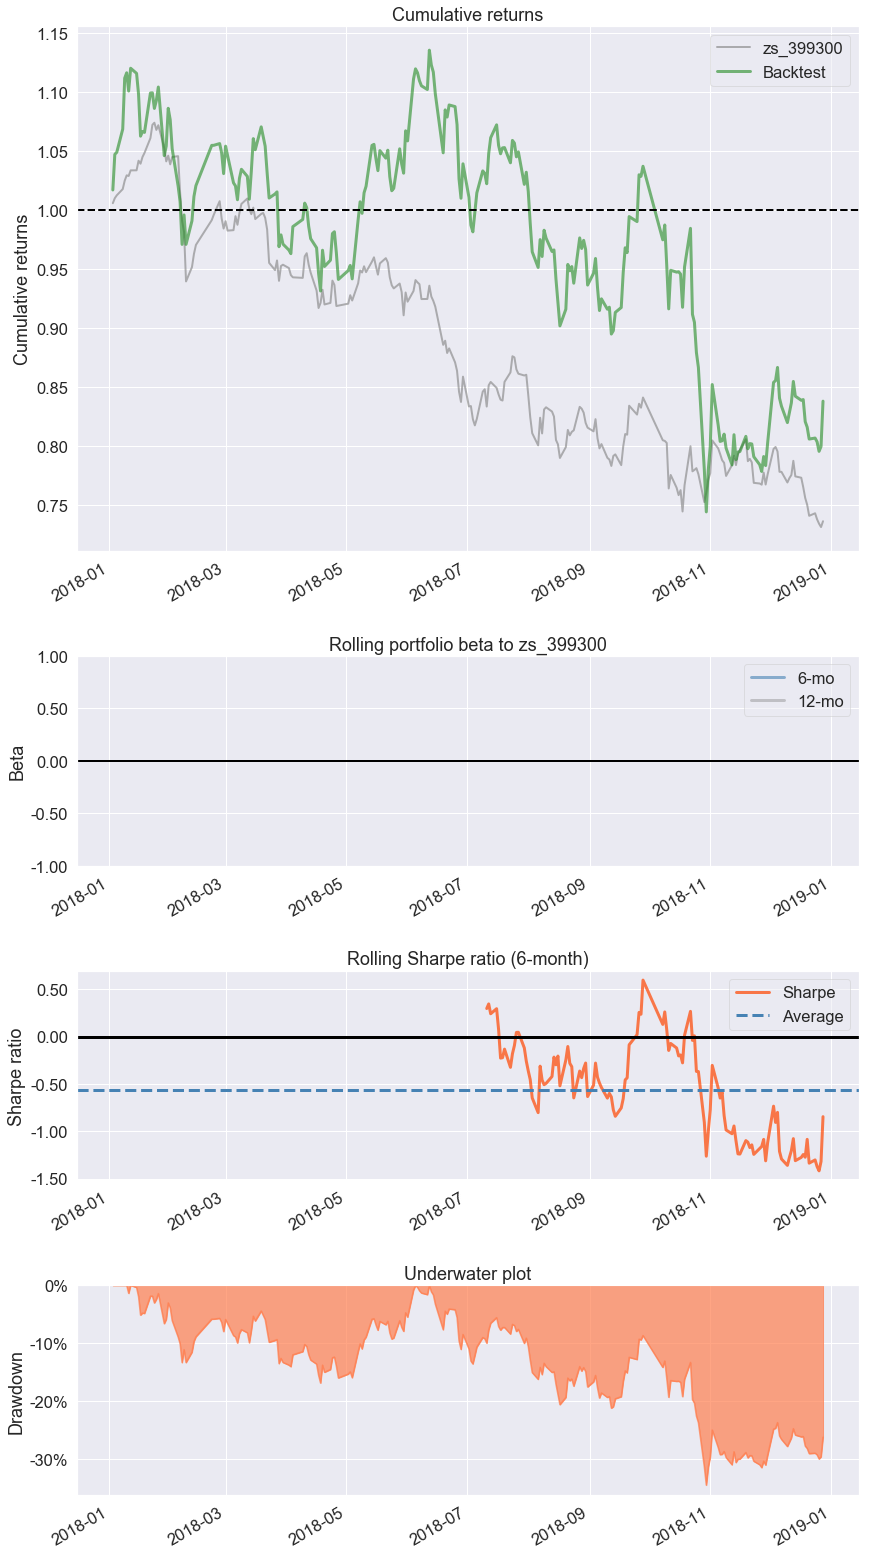

In [9]:
pf.create_simple_tear_sheet(daily_rets[SYMBOLS[0]],benchmark_rets=daily_rets['zs_'+ZS_CODE])

## 显示完整指标

Start date,2018-01-03
End date,2018-12-28
Total months,11
,Backtest
Annual return,-16.8%
Cumulative returns,-16.2%
Annual volatility,35.7%
Sharpe ratio,-0.34
Calmar ratio,-0.49
Stability,0.60
Max drawdown,-34.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,34.43,2018-06-12,2018-10-30,NaT,NaN
1,16.84,2018-01-12,2018-04-18,2018-06-12,108
2,1.39,2018-01-10,2018-01-11,2018-01-12,3
3,0.00,2018-01-03,2018-01-03,2018-01-03,1
4,0.00,2018-01-03,2018-01-03,2018-01-03,1


IndexError: invalid index

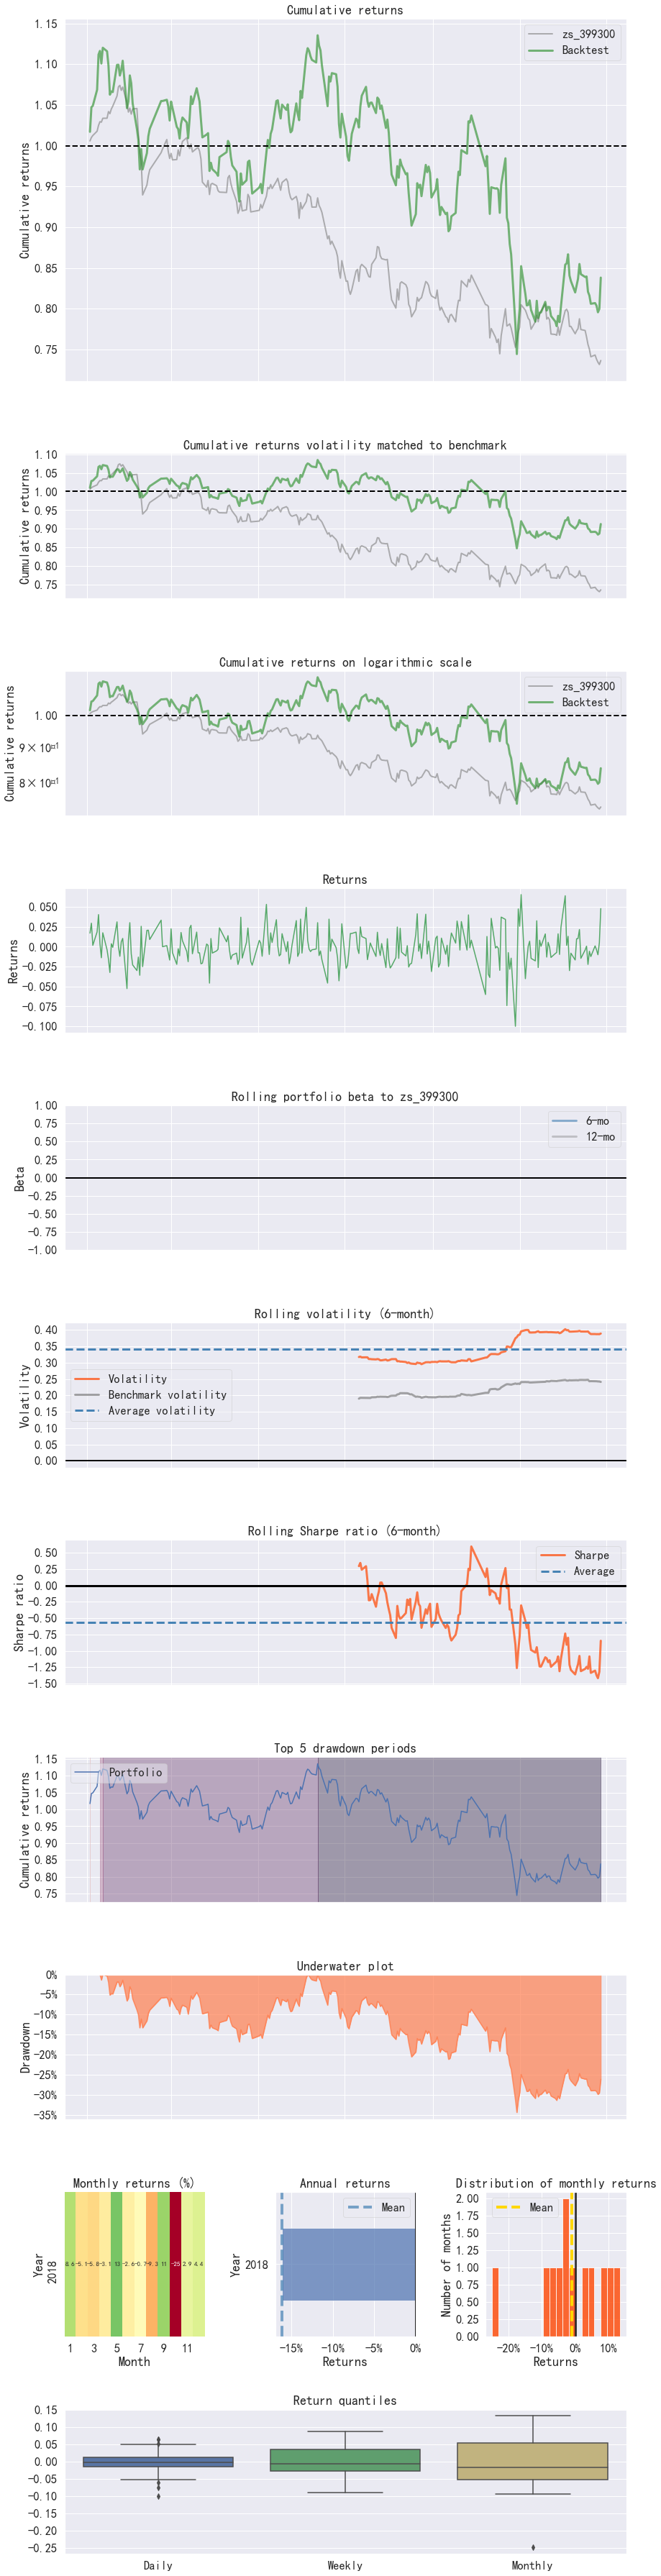

In [8]:
pf.create_full_tear_sheet(daily_rets[SYMBOLS[0]],benchmark_rets=daily_rets['zs_'+ZS_CODE])